## Topic 1. Introduction to Machine learning
## Supervised Classification: Linear models


In [4]:
# We start by importing the python libraries required to solve the exercises

import numpy as np
import matplotlib
from matplotlib import pylab as plt
import matplotlib.patches as mpatches
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

# Enables interactivity with the plots
%matplotlib notebook



The scikit-learn version is 0.19.2.


In [2]:
# We create two sets of points (XA,yA)  and (XB,yB) corresponding to two different classes

# Font size
fsize = 20     

# Points in Class A
xA = 20*np.random.rand(50)
shiftA = 20*np.random.rand(50)
yA = xA/2.0 - shiftA - 0.1


# Points in Class B
xB = 20*np.random.rand(50)
shiftB = 20*np.random.rand(50)
yB = xB/2.0 + shiftB + 0.1


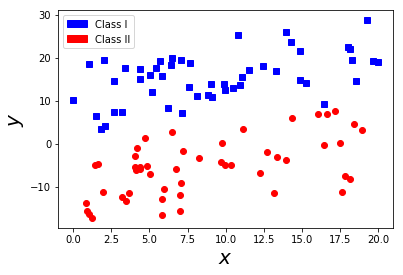

In [5]:
# The points in the two classes are visualized with different colors 
# Points in Class I in blue. Points in Class II in red

plt.figure()
plt.plot(xA, yA, 'ro')
plt.plot(xB, yB, 'bs')

blue_patch = mpatches.Patch(color='blue', label='Class I')
red_patch = mpatches.Patch(color='red', label='Class II')
plt.legend(handles=[blue_patch,red_patch])

plt.xlabel(r'$x$', fontsize=fsize)
plt.ylabel(r'$y$', fontsize=fsize)


plt.show()

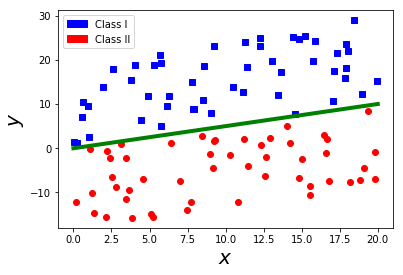

In [3]:
# We show that there exists a hyperplane that allows to perfectly divides
# points in the two classes.
# In 2-d this hyperplane corresponds to a line that is represented in green.


x1 = np.linspace(0, 20, 2000)
y1 = x1/2.0

plt.figure()

plt.plot(xA, yA, 'ro')
plt.plot(xB, yB, 'bs')

blue_patch = mpatches.Patch(color='blue', label='Class I')
red_patch = mpatches.Patch(color='red', label='Class II')
plt.legend(handles=[blue_patch,red_patch])

plt.xlabel(r'$x$', fontsize=fsize)
plt.ylabel(r'$y$', fontsize=fsize)


# Show hyperplane dividing the classes
plt.plot(x1, y1,'g', lw=4)
plt.show()


##  Linear Regression with sklearn

Let us try to learn a linear regression model that approximates all the points, regardless the  classes they belong to.

In [4]:
# We import the linear function from sklearn
from sklearn.linear_model import LinearRegression

# We define the linear regression model
lr = LinearRegression(fit_intercept=True, normalize=True)


/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Now we will learn the model. In this case what we want is a regression model for ALL the points. The regression model should predict, given a value of x, what will be the y value.

In [5]:
# We define our set of observations (the union of points from the two classes)
# We concatenate the vectors
x = np.hstack((xA,xB)).reshape(-1,1)
y = np.hstack((yA,yB)).reshape(-1,1)
#print(x.shape,y.shape)

# We fit the linear model to the data
# This produces the linear regression model (Object lr is updated)
lr.fit(x,y)

# We print the coefficient and the intercept of the linear model
# Most probably they are different to the coefficient and intercept of the original hyperplane (0.5 and 0, respectively)

print("The coefficients associated to x in the regression model is: "+str(lr.coef_[0][0])+". The intercept value  is : "+str(lr.intercept_[0])+".")


The coefficients associated to x in the regression model is: 0.5526400681175391. The intercept value  is : -0.14492979373593862.


Finally, we will use the linear regression model to predict the y values, given the x values. 


 We will use the model to predict in the same dataset (x) used to learn  the model. In general, this is not a good practice since it can give a poor estimation  of the generalization of the solutions. A better practice is to learn in one training set and testing using a different one


In [6]:
# We predict the new values using the model
y_l_predicted = lr.predict(x)


The following chart will display, the points from the two classes, the original hyperplane (in green) and the prediction produced by the regression model (in magenta). Notice that even if the decision function learned by the linear model and the original hyperplanes have different equations, the are both good decision functions. At least for the training data!!!


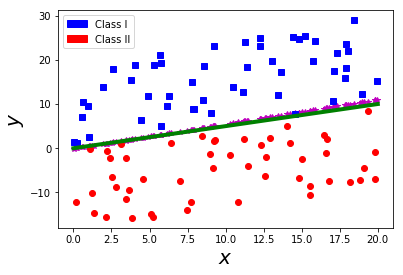

In [7]:
plt.figure()
plt.plot(x,y_l_predicted,'m*', lw=4)
plt.plot(xA, yA, 'ro', lw=4)
plt.plot(xB, yB, 'bs', lw=4)
plt.plot(x1, y1,'g', lw=4)

blue_patch = mpatches.Patch(color='blue', label='Class I')
red_patch = mpatches.Patch(color='red', label='Class II')
plt.legend(handles=[blue_patch,red_patch])
plt.xlabel(r'$x$', fontsize=fsize)
plt.ylabel(r'$y$', fontsize=fsize)

plt.show()

## Linear discriminant analysis with sklearn

Now we consider the LinearDiscriminant Analysis Classifier.

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np

# The classifier is defined
llda = LinearDiscriminantAnalysis(solver='lsqr')
#llda = LinearDiscriminantAnalysis(solver='svd')

Since this is a classifier (not a regressor). We will need to define our features, and to specify the classes.


In [9]:
# We will assign value -1 to the points in the first class, and value 1 to points in the second class.
# Usually, classes can be also assigned values 0 and 1. 
# The dependent or class variable will be "y_binary"
y_binary = np.hstack((-1*np.ones((50)),np.ones((50))))

# Now we define our features. We will use as features the coordinates of each point (x,y)
# Notice the difference with regression where "y" was a dependent variable. Here "y" is an independent variable as x.
# The matrix containing the 100 observations will be: enlarged_x

enlarged_x = np.hstack((x,y))



We learn the LDA model. This means that the parameters of the linear model (the coefficients and the intercept are learned from the data.)

In [10]:
llda.fit(enlarged_x,y_binary)

print("The coefficients associated to x in the LDA model is: "+str(llda.coef_[0][0])+", and to y is: "
      +str(llda.coef_[0][1]) +". The intercept value is :"+str(llda.intercept_[0])+".")



The coefficients associated to x in the LDA model is: -0.3164655303748007, and to y is: 0.6222573887551873. The intercept value is :-0.18032207514480936.


Now let us make the prediction using the model. Determine whether the prediction is correct. 

In [11]:
y_llda_predicted = llda.predict(enlarged_x)
print("The class values associated to the points are "+str(y_llda_predicted) )

The class values associated to the points are [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In the following cell, we use the coefficients of the model and the intercept to compute the expression of a line. 
Evaluate the cell. 

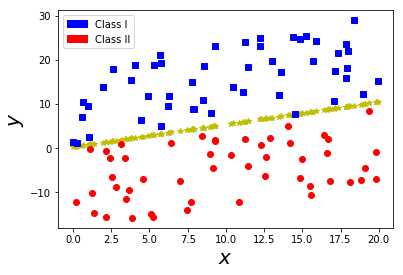

In [12]:
decision_function =  (-llda.intercept_ -llda.coef_[0][0]*x)/llda.coef_[0][1]
#print(llda_line)

plt.figure()
plt.plot(x,decision_function,'y*', lw=4)
plt.plot(xA, yA, 'ro', lw=4)
plt.plot(xB, yB, 'bs', lw=4)
#plt.plot(x1, y1,'g', lw=4)

blue_patch = mpatches.Patch(color='blue', label='Class I')
red_patch = mpatches.Patch(color='red', label='Class II')
plt.legend(handles=[blue_patch,red_patch])
plt.xlabel(r'$x$', fontsize=fsize)
plt.ylabel(r'$y$', fontsize=fsize)

plt.show()


## Exercise 1

It can be appreciated in the chart above that the line is a good separator of the two classes. 

1.1) Explain why is this expression a good separator 

1.2) Can you explain how has it been derived?

1.3) Go back to the cell where the LDA model has been defined. Modify the solver to 'svd'. Re-run the cells from the one in which the classifier is defined onwards, and check whether the learned model can discriminate classes too.

# Binary problems where the points of the two classes overlap

Now we create a more difficult classification problem where the two region classes overlap.

In [13]:
# Points in Class A
xA1 = 20*np.random.rand(50)
shiftA1 = 20*np.random.rand(50)
yA1 = (4+xA1)/2.0 - shiftA1 + 5.0

# Points in Class B
xB1 = 20*np.random.rand(50)
shiftB1 = 20*np.random.rand(50)
yB1 = (4+xB1)/2.0 + shiftB1 - 5.0

# Hyperplane dividing the two classes
x1 = np.linspace(0, 20, 2000)
y1 = (4+x1)/2.0

The points corresponding to the two classes are plotted.  We use the same hyperplane to divide points from the two classes. As it can be appreciated, the classification provided by this hyperplane is not perfect

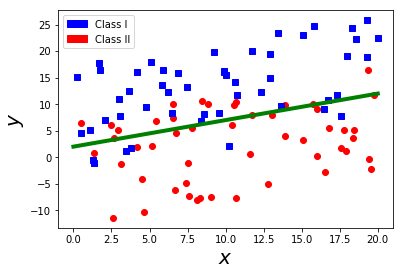

In [14]:
plt.figure()

# Show the points for the new two classes
plt.plot(xA1, yA1, 'ro', lw=4)
plt.plot(xB1, yB1, 'bs', lw=4)

# Show hyperplane dividing the classes
plt.plot(x1, y1,'g', lw=4)

blue_patch = mpatches.Patch(color='blue', label='Class I')
red_patch = mpatches.Patch(color='red', label='Class II')
plt.legend(handles=[blue_patch,red_patch])
plt.xlabel(r'$x$', fontsize=fsize)
plt.ylabel(r'$y$', fontsize=fsize)


plt.show()


We create a more difficult classification problem where the two region classes seem to overlap and where
it is not evident that a linear separator exists.


In [15]:

# Points in Class A
xA2 = 20*np.random.rand(50)
shiftA2 = 20*np.random.rand(50)
yA2 = 20*np.cos(0.2*np.pi*xA2) - shiftA2 

# Points in Class B
xB2 = 20*np.random.rand(50)
shiftB2 = 20*np.random.rand(50)
yB2 = 20*np.cos(0.2*np.pi*xB2) + shiftB2 

# Sinusoidal curve dividing the two classes      
x2 = np.linspace(0, 20, 2000)
y2 = 20*np.cos(0.2*np.pi*x2) 

The points corresponding to the two classes are plotted

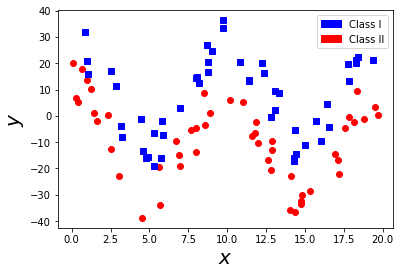

In [16]:
plt.figure()

plt.plot(xA2, yA2, 'ro')
plt.plot(xB2, yB2, 'bs')

blue_patch = mpatches.Patch(color='blue', label='Class I')
red_patch = mpatches.Patch(color='red', label='Class II')
plt.legend(handles=[blue_patch,red_patch])

plt.xlabel(r'$x$', fontsize=fsize)
plt.ylabel(r'$y$', fontsize=fsize)
plt.show()



## Exercise 2

Knowing that the points in the two classes are (xA2, yA2) for Class I;  and (xB2, yB2) for class II.


2.1) Learn a Linear Discriminant Analysis classifier for this data


2.2) Predict the labels using the learned model. 


2.3) Plot the hyplane that divides the two classes as learned by LDA 



Suggestion: Go to the previous cells and copy the relevant code for defining, learning and using the classifier for prediction. Paste the cells in the following BLANK cells. You can insert as many new cells as needed but do not delete the context of the next exercises.

We show a curve that makes a perfect separation of the data

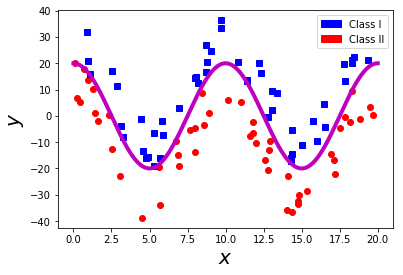

In [17]:
# Finally we also show a curve that makes a perfect separation of the data

plt.figure()

plt.plot(xA2, yA2, 'ro')
plt.plot(xB2, yB2, 'bs')

blue_patch = mpatches.Patch(color='blue', label='Class I')
red_patch = mpatches.Patch(color='red', label='Class II')
plt.legend(handles=[blue_patch,red_patch])

plt.xlabel(r'$x$', fontsize=fsize)
plt.ylabel(r'$y$', fontsize=fsize)


# Show the curve dividing the classes
plt.plot(x2, y2,'m', lw=4)
plt.show()



## EXERCISE 3

Implement a python function $myclassifier([XA,yA],[XB,yB])$ that given the sets of points for the two classes 
$(XA,yA)$ and $(XB,yB)$ determines the accuracy of the hyperplane $y=\frac{4+x}{2}$ to correctly predict the classes
of the points. 



In [30]:
# Example of the function definition. 
# Modify this code to implement your function

def myclassifier(point_classA,point_classB):
   """
   point_classA: This parameter should be a list/array of two elements, the X and Y coordinates for points in class A
   point_classB: This parameter should be a list/array of two elements, the X and Y coordinates for points in class B
   """
   # Do something here with the points and the hyperplane
   # See the suggestion in the cell below
   # Compute the accuracy
   accuracy = 0
   return accuracy





Suggestion: Create an auxiliary function $aux\_class(x_i,y_i)$ that for any point $(xi,yi)$ determines the sign of
 $(y_i-\frac{4+x_i}{2})$ and use this function to check in which region is the point located with respect to the hyperplane.
    

In [21]:
# Example of function evaluation with points corresponding to the classes
# of the previously analyzed problems.

accuracy_easy_problem = myclassifier([xA,yA],[xB,yB])
accuracy_overlapp_problem = myclassifier([xA1,yA1],[xB1,yB1])
accuracy_sine_problem = myclassifier([xA2,yA2],[xB2,yB2])

print("The accuraccies produced by the hyperplane for the three problems are, respectively,: "+str(accuracy_easy_problem)+", "
      +str(accuracy_overlapp_problem)+", and "+str(accuracy_sine_problem))


NameError: name 'myclassifier' is not defined

## EXERCISE 4


Implement a new python function that computes the accuracy for curve:  $y=20 \frac{cos(x \pi)}{5}$.    

In [32]:
# Example of the new function definition. 
# Modify this code to implement your function

def myclassifier_cosine(point_classA,point_classB):    
   # Do something here with the points and the expression of the function   
   # Compute the accuracy
   accuracy = 0
   return accuracy




In [33]:
# Example of function evaluation with points corresponding to the classes
# of the previously analyzed problems.

accuracy_easy_problem = myclassifier_cosine([xA,yA],[xB,yB])
accuracy_overlapp_problem = myclassifier_cosine([xA1,yA1],[xB1,yB1])
accuracy_sine_problem = myclassifier_cosine([xA2,yA2],[xB2,yB2])

print("The accuraccies produced by the hyperplane for the three problems are, respectively,: "+str(accuracy_easy_problem)+", "
      +str(accuracy_overlapp_problem)+", and "+str(accuracy_sine_problem))

The accuraccies produced by the hyperplane for the three problems are, respectively,: 0, 0, and 0


# Classification Scoring, and Pipelines

Now, we are going to learn classification models using different algorithms available in sk-learn, in addition to using the pipeline structure.

### We import several classifiers from sklearn

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

# We alse import the datasets available in sklearn
import sklearn.datasets as data_load

###  Finally, we import the methods for validating the classifiers and for constructing ML pipelines are also  imported

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import recall_score
from sklearn import metrics



from sklearn import preprocessing
from sklearn.pipeline import Pipeline

### We will also use the TPOT package to search for (almost) optimal pipelines

In [24]:
from tpot import TPOTClassifier

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Inspecting the Real-World datasets

We will use the breast cancer dataset, included in UCI ML Repository https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)


It has been used for the application of ML to Cancer diagnosis and prognosis: http://pages.cs.wisc.edu/~olvi/uwmp/cancer.html

In [25]:
# The dataset is loaded
breast_cancer_data = data_load.load_breast_cancer()

In [26]:
#Display options
np.set_printoptions(suppress=True)

It is a good practices to inspect the dataset before applying any ML technique, its header and also the characteristics of the data. 

In [27]:
#Some information about the dataset, understand what we are aiming for
print(breast_cancer_data["DESCR"])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

We analyze more details of the database. Rows define observations (instances of our classification problem). Columns represent variables captured in each observation.


In [40]:
breast_cancer_data["data"]

array([[ 17.99   ,  10.38   , 122.8    , ...,   0.2654 ,   0.4601 ,
          0.1189 ],
       [ 20.57   ,  17.77   , 132.9    , ...,   0.186  ,   0.275  ,
          0.08902],
       [ 19.69   ,  21.25   , 130.     , ...,   0.243  ,   0.3613 ,
          0.08758],
       ...,
       [ 16.6    ,  28.08   , 108.3    , ...,   0.1418 ,   0.2218 ,
          0.0782 ],
       [ 20.6    ,  29.33   , 140.1    , ...,   0.265  ,   0.4087 ,
          0.124  ],
       [  7.76   ,  24.54   ,  47.92   , ...,   0.     ,   0.2871 ,
          0.07039]])

Notice in the rows shown above that the range of values change among the columns. Some columns seem to have values between 0 and 1 and others much higher values. This has to be taken into account for the application of the classifiers. 

In [41]:
#Classes in the database
breast_cancer_data["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In the previous analysis, notice that we have used:   data["data"] to visualize the features and data["target"] to see the classes. 

### Learning and validating classifiers 

We define a logistic regression classifier

In [42]:
lr = LogisticRegression()

We estimate the classifier accuracy using k-fold cross-validation with k=5. The result of cross-validation will be the predictions for all instances

In [43]:
prediction = cross_val_predict(lr,breast_cancer_data.data, breast_cancer_data.target,cv=5)

In [44]:
# Let us print the predictions
print(prediction)

[0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1
 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 0 0 

With the prediction  and the target (true class value) we can compute different accuracy measures for the classifier.We do this for the accuracy metric below. 

In [45]:
lr_accuracy = metrics.accuracy_score(breast_cancer_data.target, prediction) 
print("The accuracy of the logistic regression classifier, as computed using 5-fold crossvalidation, is: ",lr_accuracy)


The accuracy of the logistic regression classifier, as computed using 5-fold crossvalidation, is:  0.9525483304042179


We can also compute the confusion matrix for the predictions made by the logistic regression classifier

In [46]:
lr_confusion_matrix = metrics.confusion_matrix(breast_cancer_data.target, prediction)
print("Confusion matrix for the predictions made by the logistic regression classifier:")
print(lr_confusion_matrix)

Confusion matrix for the predictions made by the logistic regression classifier:
[[195  17]
 [ 10 347]]


# Exercise 5

Using the examples from the previous cells, and the information given in http://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics   

Compute

1.1) Precision and recall scores for the logistic regression classifier


1.2) f1_score for the predictions made by a decision tree 

# Exercise 6

Program a function that receives one classifier (of any type), the training data, and the classes,  and outputs three metrics: accuracy, precision score and recall score, all computed using cross-validation. 


SUGGESTION: Complete the following function and test it in the following cell. 

In [28]:
def my_scores_function(clf,train_data,train_class):
    clf_prediction =
    acc = 
    precision = 
    recall = 
    return acc,precision,recall

    

SyntaxError: invalid syntax (<ipython-input-28-63f244c78916>, line 2)

In [48]:
# We will test the implemented function using a KNN classifier
knn = KNeighborsClassifier(n_neighbors= 5, metric="euclidean")
my_scores_function(knn,breast_cancer_data.data, breast_cancer_data.target)    
    

NameError: name 'my_scores_function' is not defined

We define a standard scaler to scale all features in the dataset.


In [49]:
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(X=breast_cancer_data["data"])
#scaled_data

# Exercise 7

 Use the my_scores_function() to compute the accuracy, precision, and recall of a decision tree classifier that uses the scaled data.

Scaling the data can improve the accuracy of some classifiers. We could morph the scaling and classification procedures into one single structure, in a way that both are applied with a single line of code. Below we use a pipeline with this purpose.

In [50]:
knn_scale = Pipeline([("scaler", scaler), ("k-NN", knn)])

# Exercise 8

Create a pipeline  that uses one scaler, one feature  selection method that produces 10 features, and a support vector machine classifier.


4.1) Compute the accuracy, precision, and recall of your pipeline. 


Suggestion: If needed, check sklearn web page help for feature extraction methods and support vector machine classifier definition. http://scikit-learn.org/0.18/index.html


## TPOT: Optimizing Pipelines

In [55]:
from tpot import TPOTClassifier

Now, lets use TPOT, which is a bi-objective genetic programmig tool that generates pipelines automatically, by searching for the maximum accuracy, while also attempting to keep the pipelines simple.

### We define Tpot instance, similarly to the way it is done for a regular sklearn classifier.

In [65]:
tpot = TPOTClassifier(generations=5, population_size=10, verbosity=1, random_state=16)


### Then use Tpot to "learn" a good pipeline  (it may take some time)

In [66]:
tpot.fit(features=breast_cancer_data["data"], target=breast_cancer_data["target"])

Best pipeline: RandomForestClassifier(GradientBoostingClassifier(input_matrix, learning_rate=0.5, max_depth=3, max_features=0.3, min_samples_leaf=18, min_samples_split=4, n_estimators=100, subsample=0.6500000000000001), bootstrap=False, criterion=entropy, max_features=0.55, min_samples_leaf=5, min_samples_split=4, n_estimators=100)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
        disable_update_check=False, early_stop=None, generations=5,
        max_eval_time_mins=5, max_time_mins=None, memory=None,
        mutation_rate=0.9, n_jobs=1, offspring_size=None,
        periodic_checkpoint_folder=None, population_size=10,
        random_state=16, scoring=None, subsample=1.0, use_dask=False,
        verbosity=1, warm_start=False)

Now we can see what the result is

In [64]:
tpot.fitted_pipeline_.steps

[('stackingestimator',
  StackingEstimator(estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
                learning_rate=0.5, loss='deviance', max_depth=3,
                max_features=0.3, max_leaf_nodes=None,
                min_impurity_decrease=0.0, min_impurity_split=None,
                min_samples_leaf=18, min_samples_split=4,
                min_weight_fraction_leaf=0.0, n_estimators=100,
                presort='auto', random_state=None,
                subsample=0.6500000000000001, verbose=0, warm_start=False))),
 ('randomforestclassifier',
  RandomForestClassifier(bootstrap=False, class_weight=None,
              criterion='entropy', max_depth=None, max_features=0.55,
              max_leaf_nodes=None, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=5,
              min_samples_split=4, min_weight_fraction_leaf=0.0,
              n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
              verbose

Subjecting our data to a TPOT execution, with the provided configurations, suggests that the previous pipeline is the best way to build a classifier.

## Exercise 9


Moving forward to a real classification problem we address the problem of classifying an image into a digit from 0 to 9. We will use the digit dataset in sklearn that contains 8x8 images of digits. 

9.1) Load the digits dataset from the sklearn library (you already have examples of how to read a sklearn dataset), understand how it is structured, and get used to it.

9.2) Define and fit one of the following  classifiers using the data [logistic regression, LDA, decision-tree, random forest, knn]

9.3) Use cross-validation to estimate the accuracy, recall, and precision of the classifier.


## Exercise 10

We address the problem of identifying the wine type (among three different italian wines) from a set of 13 characteristics of the wine. We will use the wine dataset in sklearn. 

10.1) Load the wine dataset from the sklearn library, understand how it is structured, and get used to it.

10.2) Use a pre-processing method to transform the data before feeding it to the classifier

10.3) Create a Pipeline which includes (at least) one preprocessing 
method, and a classifier.

10.4) Evaluate the pipeline using cross-validation

## Exercise 11
For the two databases considered in exercises 9 and 10, use TPOT to 
find a near-optimal pipeline for each dataset.



## Exercise 12

In the previous class we have learned how a Decision Tree Classifier works. In this exercise, we are going to observe how this classification algorithm performs, and how to interpret its results.

12.1) Load one of the datasets that have been used in this notebook (digits, wine, or breast).

12.2) Learn a Decision Tree classifier, by using the implementation in sklearn.

12.3) Using 5-fold cross validation, determine the f-score of the model.

12.4) Change the hyperparameters of the classifier you are familiar with to see whether the accuracy can be improved (print the classifier object to see the tunable hyperparameters).

12.5) Use the graphviz extension to save a graphical representation of the tree, and visualize it (see an example of how to use this command below).

12.6) What are the most important features for the classifier that was learned?

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [13]:
tree.export_graphviz(clf, out_file='tree.dot')  # use "dot -Tpng tree.dot -o tree.png" in command line,
                                                # or copy the code in the tree.dot file to https://dreampuf.github.io/GraphvizOnline/

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')